<a href="https://colab.research.google.com/github/dongyoung0/Final_Project/blob/develop/0.processing_code/Image_background.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/gdrive')

Mounted at /gdrive


In [ ]:
cd '../gdrive/MyDrive/SSAC/3조'

/gdrive/.shortcut-targets-by-id/15_BxZVEQYCdGCGiQ5nexpWPc1cgHVe4w/3조


In [ ]:
import cv2
import numpy as np
import pandas as pd
import requests
import matplotlib.pyplot as plt

In [ ]:
def show_img_compar4(img_1, img_2, img_3, img_4):
    f, ax = plt.subplots(1, 4, figsize=(10,10))
    ax[0].imshow(img_1)
    ax[1].imshow(img_2)
    ax[2].imshow(img_3)
    ax[3].imshow(img_4)
    ax[0].axis('off') #hide the axis
    ax[1].axis('off')
    ax[2].axis('off')
    ax[3].axis('off')
    f.tight_layout()
    plt.show()

def show_img_compar5(img_1, img_2, img_3, img_4, img_5):
    f, ax = plt.subplots(1, 5, figsize=(10,10))
    ax[0].imshow(img_1)
    ax[1].imshow(img_2)
    ax[2].imshow(img_3)
    ax[3].imshow(img_4)
    ax[4].imshow(img_5)
    ax[0].axis('off') #hide the axis
    ax[1].axis('off')
    ax[2].axis('off')
    ax[3].axis('off')
    ax[4].axis('off')
    f.tight_layout()
    plt.show()

In [ ]:
color_dict = {'Black': [0,0,0], 
              'Gray': [128, 128, 128],
              'Silver': [192, 192, 192],
              'White': [255, 255, 255],
              'Red': [255, 0, 0],
              'Maroon': [128, 0, 0],
              'Yellow': [255, 255, 0],
              'Olive': [128, 128, 0],
              'Lime': [0, 255, 255],
              'Green': [0, 128, 0],
              'Aqua': [0, 255, 255],
              'Teal': [0, 128, 128],
              'Blue': [0, 0, 255],
              'Navy': [0, 0, 128],
              'Magenta': [255, 0, 255],
              'Purple': [128, 0, 128],
              'Orange': [255,165,0],
              'Wheat': [245,222,179]
              }
              
def rgb_to_color(rgb, color_dict=color_dict):
    color_distance = [np.linalg.norm(np.array(rgb)-col) for col in color_dict.values()]
    return list(color_dict.keys())[np.argmin(color_distance)]

In [ ]:
def visualize_background(cid):
    url = f'https://media.bunjang.co.kr/product/{cid}_...'
    image_nparray = np.asarray(bytearray(requests.get(url).content), dtype=np.uint8)
    image = cv2.imdecode(image_nparray, cv2.IMREAD_COLOR)
    image = cv2.resize(image, dsize=(224, 224), interpolation=cv2.INTER_AREA)
    image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

    # 초기 마스크 생성
    mask = np.zeros(image_rgb.shape[:2], np.uint8)

    # grabCut에 사용할 임시 배열 생성
    bgdModel = np.zeros((1, 65), np.float64)
    fgdModel = np.zeros((1, 65), np.float64)

    # 사각형 좌표: 시작점의 x,y  ,넢이, 너비
    # rect = (0, 56, 250, 150)
    # rect = (0, 56, 224, 224)

    rect = (50, 50, 450, 290)

    # grabCut 실행
    cv2.grabCut(image_rgb, # 원본 이미지
            mask,       # 마스크
            rect,  # 사각형
            bgdModel,   # 배경을 위한 임시 배열
            fgdModel,   # 전경을 위한 임시 배열 
            5,          # 반복 횟수
            cv2.GC_INIT_WITH_RECT) # 사각형을 위한 초기화

    # 배경인 곳은 0, 그 외에는 1로 설정한 마스크 생성
    mask_2 = np.where((mask==2) | (mask==0), 0, 1).astype('uint8')
    mask_b = np.where((mask==2) | (mask==0), 1, 0).astype('uint8')

    # 이미지에 새로운 마스크를 곱행 배경을 제외
    image_nobg = image_rgb * mask_2[:, :, np.newaxis]
    image_bg = image_rgb * mask_b[:, :, np.newaxis]

    background_ratio = (mask_b.sum())/(image_rgb.shape[0]*image_rgb.shape[1])

    img_temp = [np.delete(image_rgb[:,:,i], (mask_2.reshape(-1)==1)) for i in range(3)]

    # 평균값
    rgb = np.array([int(temp.mean()) for temp in img_temp])
    color = rgb_to_color(rgb)
    # 최빈값
    # rgb = []
    # for i_t in img_temp:
    #     u_t, c_t = np.unique(i_t, axis=0, return_counts=True)
    #     rgb.append(u_t[np.argmax(c_t)])

    # # 시각화
    
    temp_img = image_nobg.copy()
    temp_img1 = image_nobg.copy()
    for i in range(3):
        temp_img[:,:,i] = rgb[i]
        temp_img1[:,:,i] = color_dict[color][i]

    show_img_compar5(image_rgb, image_nobg, image_bg, temp_img, temp_img1)
    print(color)
    print(rgb)
    # huv
    # image_hsv = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)
    # h, s, v = cv2.split(image_hsv)
    # h_back = np.delete(h, (mask_2.reshape(-1)==1))

In [ ]:
def get_background(cid):
    url = f'https://media.bunjang.co.kr/product/{cid}_...'
    image_nparray = np.asarray(bytearray(requests.get(url).content), dtype=np.uint8)
    image = cv2.imdecode(image_nparray, cv2.IMREAD_COLOR)
    image = cv2.resize(image, dsize=(224, 224), interpolation=cv2.INTER_AREA)
    image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

    # 초기 마스크 생성
    mask = np.zeros(image_rgb.shape[:2], np.uint8)

    # grabCut에 사용할 임시 배열 생성
    bgdModel = np.zeros((1, 65), np.float64)
    fgdModel = np.zeros((1, 65), np.float64)

    # 사각형 좌표: 시작점의 x,y  ,넢이, 너비
    # rect = (0, 56, 250, 150)
    # rect = (0, 56, 224, 224)

    rect = (50, 50, 450, 290)

    # grabCut 실행
    cv2.grabCut(image_rgb, # 원본 이미지
            mask,       # 마스크
            rect,  # 사각형
            bgdModel,   # 배경을 위한 임시 배열
            fgdModel,   # 전경을 위한 임시 배열 
            5,          # 반복 횟수
            cv2.GC_INIT_WITH_RECT) # 사각형을 위한 초기화

    # 배경인 곳은 0, 그 외에는 1로 설정한 마스크 생성
    mask_2 = np.where((mask==2) | (mask==0), 0, 1).astype('uint8')
    mask_b = np.where((mask==2) | (mask==0), 1, 0).astype('uint8')

    # 이미지에 새로운 마스크를 곱행 배경을 제외
    image_nobg = image_rgb * mask_2[:, :, np.newaxis]
    image_bg = image_rgb * mask_b[:, :, np.newaxis]

    background_ratio = (mask_b.sum())/(image_rgb.shape[0]*image_rgb.shape[1])

    img_temp = [np.delete(image_rgb[:,:,i], (mask_2.reshape(-1)==1)) for i in range(3)]

    # 평균값
    rgb = np.array([int(temp.mean()) for temp in img_temp])
    color = rgb_to_color(rgb)
    # 최빈값
    # rgb = []
    # for i_t in img_temp:
    #     u_t, c_t = np.unique(i_t, axis=0, return_counts=True)
    #     rgb.append(u_t[np.argmax(c_t)])

    # # 시각화
    
    # temp_img = image_nobg.copy()
    # for i in range(3):
    #     temp_img[:,:,i] = rgb[i]
    # show_img_compar4(image_rgb, image_nobg, image_bg, temp_img)

    # huv
    # image_hsv = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)
    # h, s, v = cv2.split(image_hsv)
    # h_back = np.delete(h, (mask_2.reshape(-1)==1))

    return round(background_ratio, 4), rgb, color

In [ ]:
cid_list = pd.read_csv('김동영/id_list')

In [ ]:
from tqdm.notebook import tqdm

In [ ]:
# bg_df = pd.DataFrame(columns={'content_id', 'bg_ratio', 'rgb', 'color'})
# for idx, row in tqdm(cid_list.iterrows(), total = len(cid_list)):
#     try:
#         br, rgb, color = get_background(row.content_id)
#         bg_df.loc[idx] = {'content_id': row.content_id, 'bg_ratio': br, 'rgb': rgb, 'color': color}
#     except:
#         bg_df.loc[idx] = {'content_id': row.content_id, 'bg_ratio': 'no_img', 'rgb': 'no_img', 'color': 'no_img'}
#     # if idx % 1000 == 0:
#     #     bg_df.to_csv('김동영/color.csv', index=False)


  0%|          | 0/575960 [00:00<?, ?it/s]

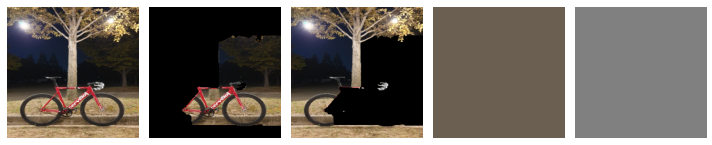

In [ ]:
visualize_background(167271396)

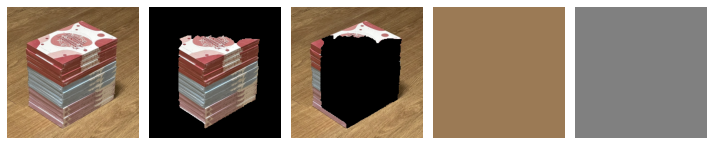

In [ ]:
visualize_background(171667838)

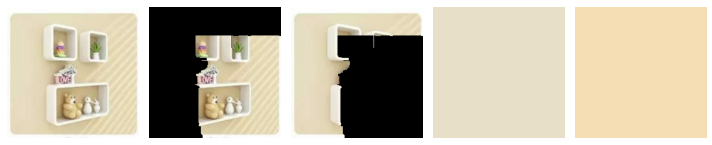

Wheat
[231 223 200]


In [ ]:
visualize_background(161976020)

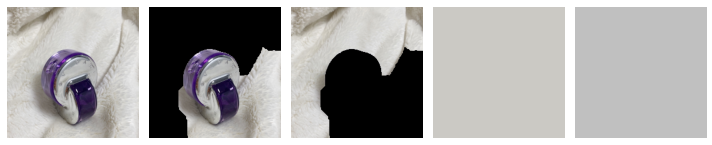

Silver
[203 201 196]


In [ ]:
visualize_background(174342657)